In [40]:
from torchvision import datasets, transforms
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [37]:
CSV_PATH = "../Plants-ConvNets-ViT/scripts/from_scratch/confusion.csv"
DATASET_PATH = "Plant_leave_diseases_dataset_without_augmentation"
HISTOGRAMS_DIR = "Classes_histograms/"

In [4]:
def get_label_mappings(data_dir):
    # Use a dummy transform since we just need the class names and indices
    transform = transforms.Compose([transforms.ToTensor()])
    
    # Load the dataset to access the class_to_idx attribute
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    
    # Return the mapping
    # Return the reversed mapping
    return {v: k for k, v in dataset.class_to_idx.items()}

In [5]:
classes_mapping = get_label_mappings(DATASET_PATH)
classes_mapping

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Background_without_leaves',
 5: 'Blueberry___healthy',
 6: 'Cherry___Powdery_mildew',
 7: 'Cherry___healthy',
 8: 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 9: 'Corn___Common_rust',
 10: 'Corn___Northern_Leaf_Blight',
 11: 'Corn___healthy',
 12: 'Grape___Black_rot',
 13: 'Grape___Esca_(Black_Measles)',
 14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 15: 'Grape___healthy',
 16: 'Orange___Haunglongbing_(Citrus_greening)',
 17: 'Peach___Bacterial_spot',
 18: 'Peach___healthy',
 19: 'Pepper,_bell___Bacterial_spot',
 20: 'Pepper,_bell___healthy',
 21: 'Potato___Early_blight',
 22: 'Potato___Late_blight',
 23: 'Potato___healthy',
 24: 'Raspberry___healthy',
 25: 'Soybean___healthy',
 26: 'Squash___Powdery_mildew',
 27: 'Strawberry___Leaf_scorch',
 28: 'Strawberry___healthy',
 29: 'Tomato___Bacterial_spot',
 30: 'Tomato___Early_blight',
 31: 'Tomato___Late_blight',
 32: 'Toma

In [6]:
df = pd.read_csv(CSV_PATH)
df

,True,Predicted
0,1,38
1,10,36
2,7,36
3,16,16
4,20,36
...,...,...
11085,5,16
11086,31,36
11087,1,38
11088,29,36


In [7]:
def predicted_labels(y_pred):
    return np.array(list(set(y_pred)))

def target_names_generator(labels_to_use, classes_mapping):
    target_names = []
    for label in labels_to_use:
        target_names.append(classes_mapping[label])

    return np.array(target_names)


In [8]:
y_true = np.array(df["True"])
y_pred = np.array(df["Predicted"])
labels_to_use = predicted_labels(y_pred)
target_names = target_names_generator(labels_to_use, classes_mapping)

In [23]:
print(classification_report(y_true, y_pred, labels=labels_to_use, target_names=target_names))

                                            precision    recall  f1-score   support

                        Apple___Apple_scab       0.67      0.03      0.06       120
                           Apple___healthy       1.00      0.00      0.01       299
                 Background_without_leaves       0.56      0.17      0.26       220
                       Blueberry___healthy       0.16      0.07      0.09       284
Corn___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       105
                        Corn___Common_rust       0.40      0.19      0.26       235
               Corn___Northern_Leaf_Blight       0.36      0.14      0.20       202
                            Corn___healthy       0.59      0.31      0.41       246
                         Grape___Black_rot       0.00      0.00      0.00       232
              Grape___Esca_(Black_Measles)       0.20      0.08      0.11       274
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.00      0.00      0.00  

Here we do not consider the classes which do not have been predicted. Notice that this data refers to the validation set (20% of about 55000 samples) 

|        | Pred A | Pred B | Pred C |
|--------|-------|-------|-------|
| Actual A | AA    | AB    | AC    |
| Actual B | BA    | BB    | BC    |
| Actual C | CA    | CB    | CC    |



Where AA represents the number of true predictions of class A, AB represents the number of instances that belong to class A but were predicted as class B, and so on.

    Metrics Calculation for Each Class:

For class A:

    True Positives (TP) for class A = AA
    False Positives (FP) for class A = AB + AC (sum of row A excluding AA)
    True Negatives (TN) for class A = sum of all values outside of column A and row A
    False Negatives (FN) for class A = BA + CA (sum of column A excluding AA)

* Precision for a given class is the fraction of instances correctly classified as belonging to a specific class out of all instances the model predicted to belong to that class:
$$\text{Precision}_{\text{Class A}} = \frac{TP_{\text{Class A}}}{(TP_{\text{Class A}}+FP_{\text{Class A}})}$$

* Recall for a given class is the fraction of instances in a class that the model correctly classified out of all instances in that class:
$$\text{Recall}_{\text{Class A}} = \frac{TP_{\text{Class A}}}{TP_{\text{Class A}}+FN_{\text{Class A}}}$$

* F1 Score for a given class is a relation between Precision and Recall:
$$\text{F1 Score}_{\text{Class A}} = \frac{2 \cdot \text{Precision}_{\text{Class A}} \cdot \text{Recall}_{\text{Class A}}}{\text{Precision}_{\text{Class A}} + \text{Recall}_{\text{Class A}}}$$

In [28]:
metrics_dict = classification_report(y_true, y_pred, labels=labels_to_use, target_names=target_names, output_dict=True)
metrics = pd.DataFrame(metrics_dict).transpose()
metrics = metrics.drop(["micro avg", "weighted avg", "macro avg"], axis=0)
metrics.to_csv("classification_report.csv")

In [29]:
f1_avg = metrics_dict["weighted avg"]["f1-score"]
metrics = metrics.sort_values("f1-score", ascending=False)
metrics = metrics[metrics["f1-score"] > f1_avg]
metrics

,precision,recall,f1-score,support
Corn___healthy,0.587786,0.313008,0.408488,246.0
Soybean___healthy,0.347711,0.381274,0.363720,1036.0
Orange___Haunglongbing_(Citrus_greening),0.297486,0.392627,0.338498,1085.0
Background_without_leaves,0.558824,0.172727,0.263889,220.0
Corn___Common_rust,0.403670,0.187234,0.255814,235.0
Squash___Powdery_mildew,0.416667,0.161290,0.232558,372.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.125646,0.780018,0.216429,1091.0
Corn___Northern_Leaf_Blight,0.363636,0.138614,0.200717,202.0


In [32]:
suspicious_classes = list(metrics.index)

In [33]:
suspicious_classes

['Corn___healthy',
 'Soybean___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Background_without_leaves',
 'Corn___Common_rust',
 'Squash___Powdery_mildew',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Corn___Northern_Leaf_Blight']

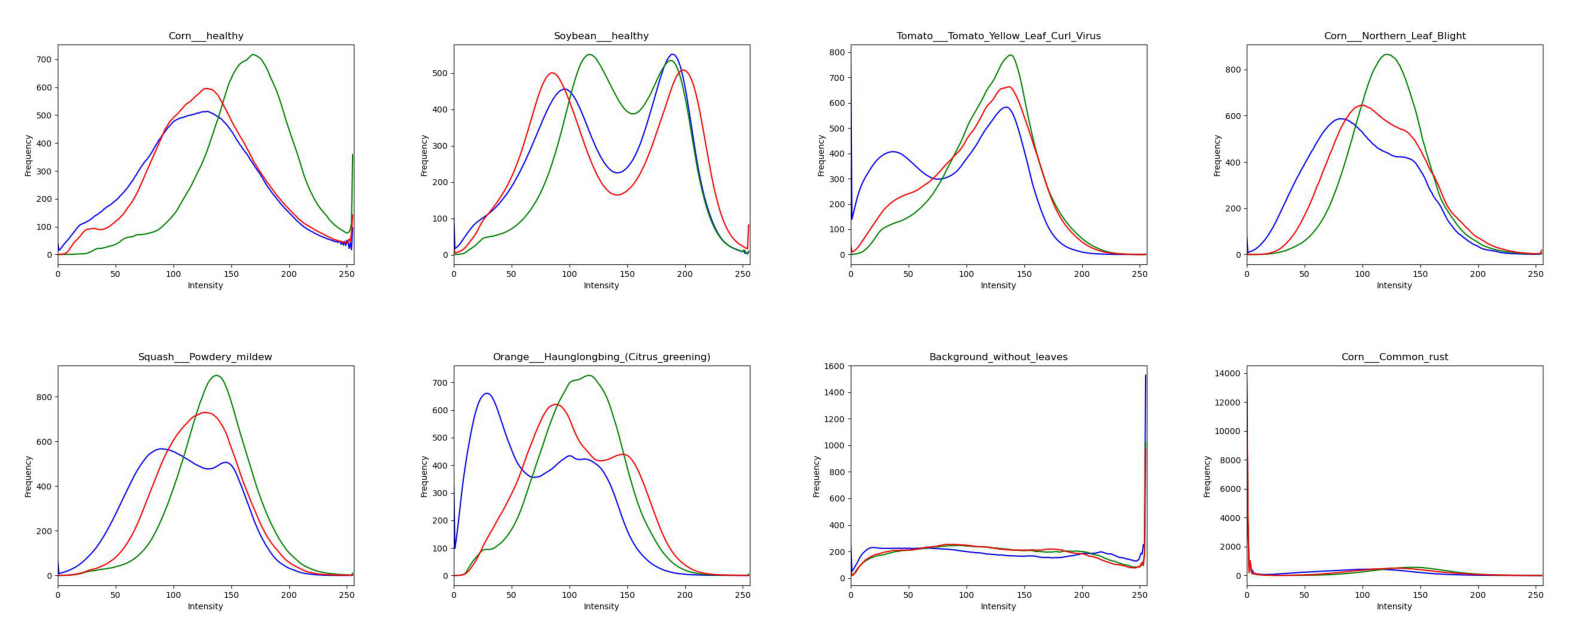

In [61]:
other_figs_paths = []
i = 0
fig, axarr = plt.subplots(2, 4, figsize=(16,7))
for filename in os.listdir(HISTOGRAMS_DIR):
    f = os.path.join(HISTOGRAMS_DIR, filename)
    # checking if it is a file

    if os.path.isfile(f):
        class_name = os.path.basename(f).split('.')[0]
        if class_name in suspicious_classes:
            img = mpimg.imread(f)
            axarr[i//4, i%4].imshow(img)
            axarr[i//4, i%4].axis('off')
            i += 1
        else:
            other_figs_paths.append(f)


plt.tight_layout()
plt.show()

In [62]:
print(other_figs_paths)
print(len(other_figs_paths))

['Classes_histograms/Corn___Cercospora_leaf_spot Gray_leaf_spot.jpg', 'Classes_histograms/Tomato___Spider_mites Two-spotted_spider_mite.jpg', 'Classes_histograms/Tomato___Target_Spot.jpg', 'Classes_histograms/Grape___Esca_(Black_Measles).jpg', 'Classes_histograms/Potato___healthy.jpg', 'Classes_histograms/Tomato___Late_blight.jpg', 'Classes_histograms/Cherry___healthy.jpg', 'Classes_histograms/Potato___Late_blight.jpg', 'Classes_histograms/Potato___Early_blight.jpg', 'Classes_histograms/Pepper,_bell___healthy.jpg', 'Classes_histograms/Strawberry___Leaf_scorch.jpg', 'Classes_histograms/Tomato___Tomato_mosaic_virus.jpg', 'Classes_histograms/Raspberry___healthy.jpg', 'Classes_histograms/Apple___Apple_scab.jpg', 'Classes_histograms/Cherry___Powdery_mildew.jpg', 'Classes_histograms/Blueberry___healthy.jpg', 'Classes_histograms/Apple___Cedar_apple_rust.jpg', 'Classes_histograms/Apple___Black_rot.jpg', 'Classes_histograms/Tomato___Septoria_leaf_spot.jpg', 'Classes_histograms/Tomato___Early_bl

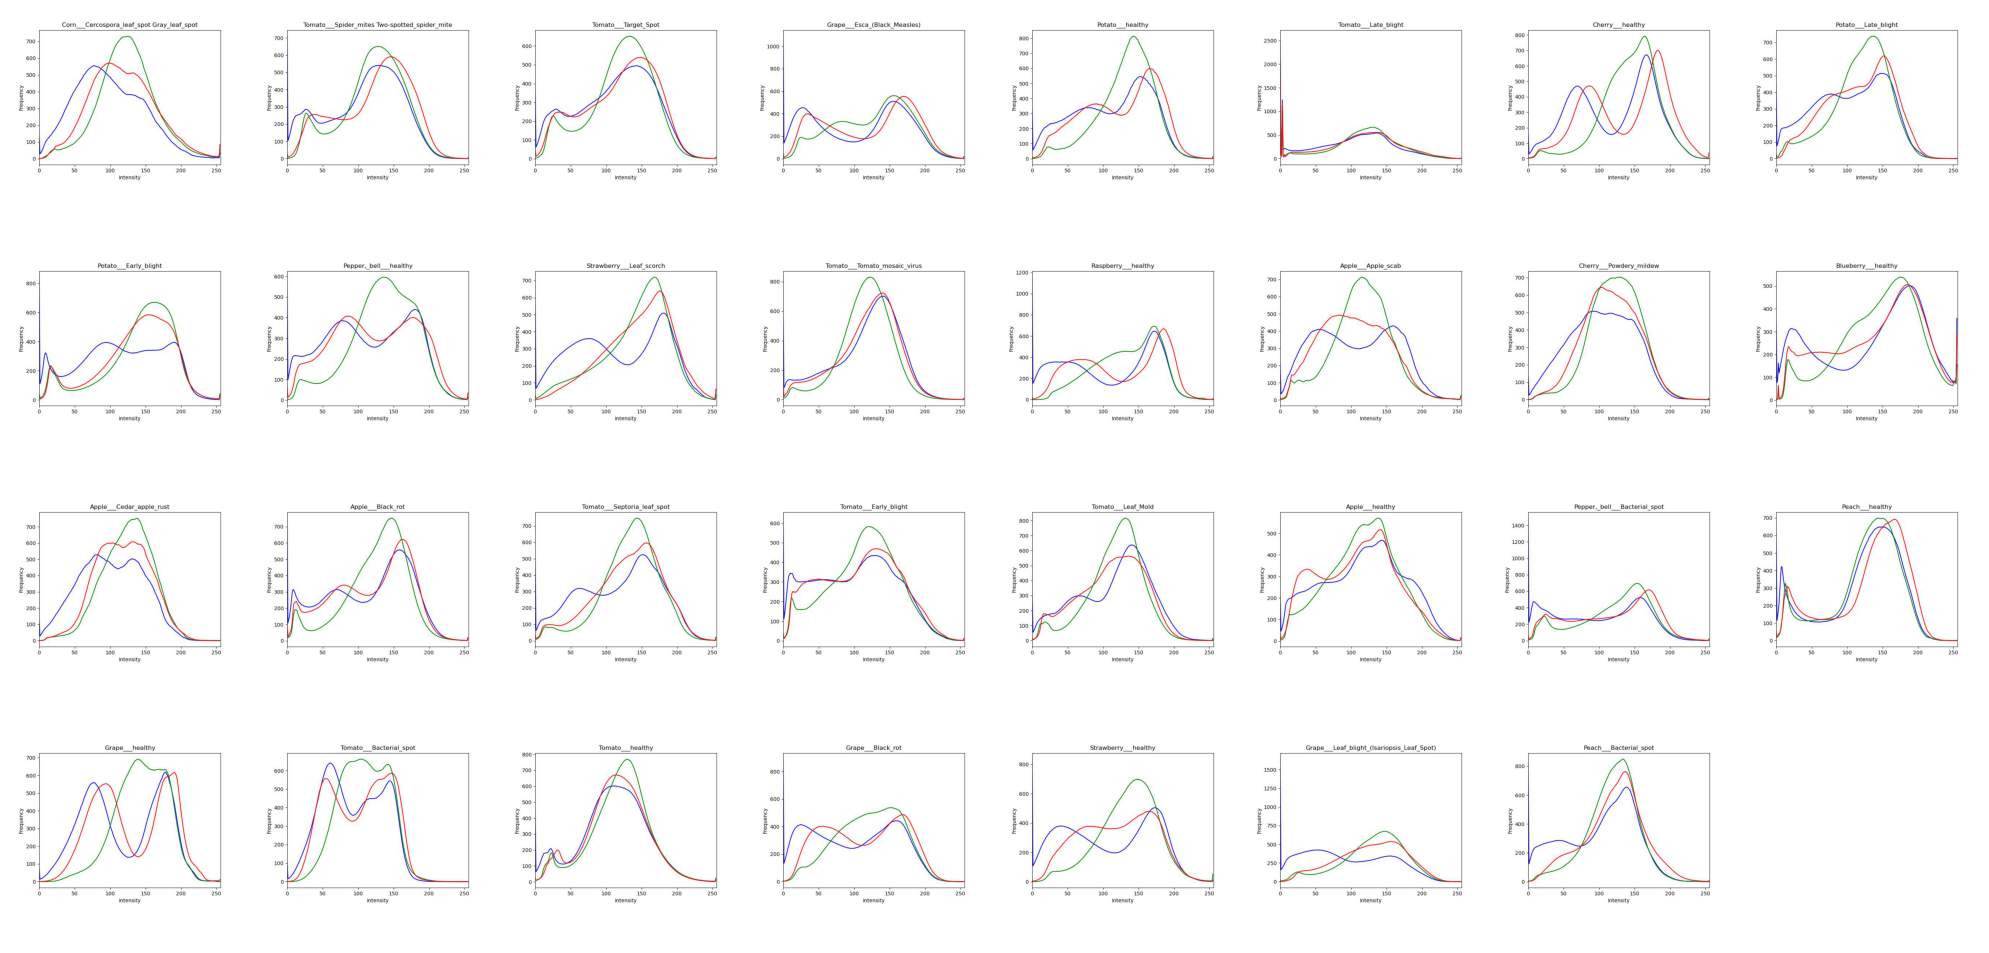

In [66]:
i = 0
fig, axarr = plt.subplots(4, 8, figsize=(20,10))
for file in other_figs_paths:
    img = mpimg.imread(file)
    axarr[i//8, i%8].imshow(img)
    i += 1

for ax in axarr.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()